In [1]:
% matplotlib inline
import random
import torch
from d2l import torch as d2l

In [7]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [8]:
print('features:', features[0], '\nlabels:', labels[0])

features: tensor([-1.3504, -1.9969]) 
labels: tensor([8.2779])


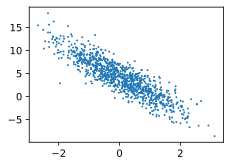

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

In [14]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.2999,  0.1982],
        [ 0.0961,  0.2268],
        [ 0.8935,  0.1786],
        [ 0.2736, -0.5431],
        [ 1.5354,  0.8303],
        [-0.1250,  0.2385],
        [-0.9666, -0.6485],
        [-0.4906, -1.3149],
        [ 0.4550,  0.4723],
        [-0.6044,  1.2022]]) 
 tensor([[ 6.1290],
        [ 3.6258],
        [ 5.3848],
        [ 6.5810],
        [ 4.4466],
        [ 3.1475],
        [ 4.4953],
        [ 7.6773],
        [ 3.5183],
        [-1.0902]])


In [15]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [16]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [17]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [18]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [19]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss


In [20]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()): f}')

epoch 1, loss  0.042592
epoch 2, loss  0.000160
epoch 3, loss  0.000049


In [21]:
print(f"{true_w - w.reshape(true_w.shape)}")
print(f'{true_b - b}')

tensor([ 0.0002, -0.0006], grad_fn=<SubBackward0>)
tensor([0.0003], grad_fn=<RsubBackward1>)
